# Define Reward position on .avi files
#### Choose a path that contains one or mutliple .avi files. A window will open and tqqhe first frame of each video will be diplayed. Click on the frame where the reward position was. A red cross will appear at the location. Click again to change the location of the reward. Press "q" to go to the next video. If you clicked on the frame, the X Y positions will be saved as a text file in the folder conainting the video. If you pressed "q" and did not click on the frame, nothing will be saved.

In [ ]:
# Path to the root folder containing video files
video_folder = '//10.69.168.1/crnldata/forgetting/Aurelie/CheeseboardExperiment/DAQ_data/AB/Test/'

In [ ]:
file="//10.69.168.1/crnldata/forgetting/Aurelie/CheeseboardExperiment/DAQ_data/AB/Test/Lou/Cheeseboard/2024_12_06/11_07_47/My_First_WebCam/0_compressed.avi"

if '/Cheeseboard/' in file and 'DLC' not in file:
    print('ok')

In [ ]:
import cv2
import os

# Global variable to store the click position
click_position = None
frame_copy = None

# Callback function to handle mouse click events
def on_click(event, x, y, flags, param):
    global click_position, frame_copy
    if event == cv2.EVENT_LBUTTONDOWN:  # Left mouse button click
        click_position = (x, y)
        print(f"Clicked at: ({x}, {y})")
        
        # Draw a red cross at the clicked position
        # Create a copy of the frame to draw the cross
        frame_copy = frame.copy()
        cv2.line(frame_copy, (x-20, y), (x+20, y), (0, 0, 255), 2)  # Horizontal line
        cv2.line(frame_copy, (x, y-20), (x, y+20), (0, 0, 255), 2)  # Vertical line

# Function to save the last click position to a text file
def save_click_position(video_path, position):
    if position:
        # Create the text file path by changing extension to .txt
        txt_file_path = os.path.splitext(video_path)[0] + "_reward_position.txt"
        with open(txt_file_path, 'w') as f:
            f.write(f"Reward Position: x={position[0]}, y={position[1]}")
        print(f"Saved reward position to {txt_file_path}")


# Walk through the directory recursively
for root, dirs, files in os.walk(video_folder):
    # Filter for video files (avi, mp4, mov)
    video_files = [f for f in files if f.endswith(('.avi', '.mp4', '.mov'))]
    
    # Process only videos where path contains "MyFirstWebcam"
    for video_file in video_files:
        video_path = os.path.join(root, video_file)
        # Normalize the path to avoid mixed slashes
        video_path = os.path.normpath(video_path)
        #print(video_path)
        
        if "My_First_WebCam" in video_path and "Cheeseboard" in video_path and 'DLC' not in video_file:
            
            # Load the video file
            cap = cv2.VideoCapture(video_path)

            # Check if the video file is opened
            if not cap.isOpened():
                print(f"Error: Could not open video {video_file}")
                continue

            # Read the first frame
            ret, frame = cap.read()
            if not ret:
                print(f"Error: Could not read the first frame of {video_file}")
                cap.release()
                continue

            # Create a copy of the frame to update it after click
            frame_copy = frame.copy()

            # Display the first frame using OpenCV
            cv2.imshow(video_path, frame_copy)

            # Set up the callback for mouse clicks
            cv2.setMouseCallback(video_path, on_click)
            click_position = None

            # Wait for a key press (user can click on the frame)
            while True:
                # Display the updated frame (with red cross if clicked)
                cv2.imshow(video_path, frame_copy)
                
                # Wait for a key press
                key = cv2.waitKey(1) & 0xFF
                if key == ord('q'):  # Press 'q' to quit
                    break

            # Save the click position to a text file before quitting
            if click_position:
                save_click_position(video_path, click_position)

            # Release the video and close the window
            cap.release()
            cv2.destroyAllWindows()

print("Processing completed for all relevant videos.")

Note: the cheeseboard table diameter is equal to 270 pix (= 120cm) so 
1 cm = 2.25 pix or
20 cm = 45 pix

In [59]:
filename = "//10.69.168.1/crnldata/forgetting/Aurelie/CheeseboardExperiment/DAQ_data/AB/Test/Blue/Cheeseboard/2024_12_06/14_52_03/My_First_WebCam/0_compressedDLC_resnet50_CheeseboardMiniscopeFeb21shuffle1_59000.h5"

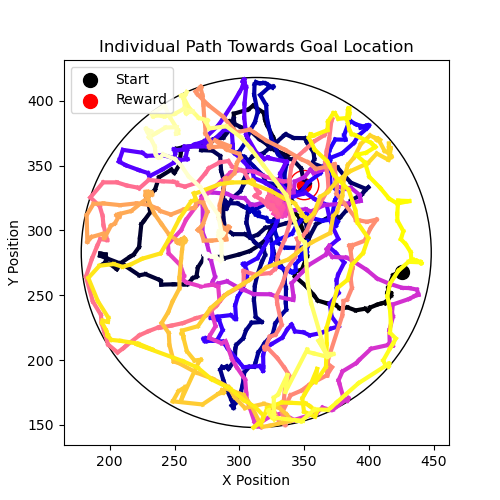

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib widget

df = pd.read_hdf(filename)
df.to_csv(filename.replace(".h5", ".csv"))
#df.iloc[:, -1]=df.iloc[:, -1].round()  
df.iloc[:, 0] = df.apply(lambda row: row.iloc[0] if row.iloc[-1] > 0.9  else np.nan, axis=1)
df.iloc[:, 1] = df.apply(lambda row: row.iloc[1] if row.iloc[-1] > 0.9 else np.nan, axis=1)
X=df.iloc[:,0]
Y=df.iloc[:,1]

# Define the goal location
goal_x, goal_y = 350,335
threshold_distance = 5*2.25  # Threshold to define "close"
table_mask_x,table_mask_y = 313, 283
table_radius=270/2

# Function to calculate the Euclidean distance
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

"""
# Create a more complicated path for the individual (random walk with turns)
num_steps = 200  # Number of steps in the journey
x, y = 0, 0  # Starting position

# List to store positions over time
individual_positions = [(x, y)]

# Random walk simulation
for _ in range(num_steps):
    # Random move in one of the 8 directions (up, down, left, right, or diagonal)
    direction = random.choice([(-1, 0), (1, 0), (0, -1), (0, 1), 
                              (-1, -1), (-1, 1), (1, -1), (1, 1)])
    x += direction[0]
    y += direction[1]
    individual_positions.append((x, y))
"""

# Separate the individual's positions into x and y coordinates
individual_x =np.array(X.values)
individual_y = np.array(Y.values)

for i,x in enumerate(individual_x):
    y=individual_y[i]
    if calculate_distance(x, y, table_mask_x, table_mask_y) >= table_radius:
        individual_x[i]=np.nan
        individual_y[i]=np.nan
individual_x = individual_x[~np.isnan(individual_x)]        
individual_y = individual_y[~np.isnan(individual_y)]


# Create the plot
fig, ax = plt.subplots(figsize=(5, 5)) 

# Plot individual positions over time
#plt.plot(individual_x, individual_y, label="Individual's Path", color='b')

cmap = plt.get_cmap('gnuplot2')
norm = plt.Normalize(vmin=0, vmax=len(individual_x))
# Plot each segment of the path with a different color
for i in range(1, len(individual_x)):
    ax.plot(individual_x[i-1:i+1], individual_y[i-1:i+1], color=cmap(norm(i)), linewidth=3)

"""
# Label the dots close to the goal location
for i,x in enumerate(individual_x):
    y=individual_y[i]
    if calculate_distance(x, y, goal_x, goal_y) <= threshold_distance:
        #plt.text(x, y, f"({x}, {y})", fontsize=9, color='green', ha='right')
        plt.scatter(x, y, color='green', s=100)
"""

x_start=individual_x[~np.isnan(individual_x)][0] if np.any(~np.isnan(individual_x)) else None
y_start=individual_y[~np.isnan(individual_y)][0] if np.any(~np.isnan(individual_y)) else None
plt.scatter(x_start, y_start, color='black', s=100, label='Start')

circle=plt.Circle((goal_x, goal_y), threshold_distance, color='r', fill=False)  # Create a circle
plt.gca().add_patch(circle)  # gca() gets the current axis
circle=plt.Circle((table_mask_x, table_mask_y), table_radius, color='k', fill=False)  # Create a circle
plt.gca().add_patch(circle)  # gca() gets the current axis
ax.set_aspect('equal')

# Mark the goal location
plt.scatter(goal_x, goal_y, color='red', s=100, label='Reward')

# Add labels and title
plt.title('Individual Path Towards Goal Location')
plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.legend(loc='upper left')
plt.show()

%matplotlib widget
